In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [33]:
MODEL = 'model_1'
DELTA = 0.75


delta_folders = {0.25:'D25', 0.40:'D40', 0.50:'D50', 0.68:'D68', 0.75:'D75'}
stats_df = pd.read_csv(f"sim_out/{MODEL}/{delta_folders[DELTA]}/statsdf.csv")
i_cb_dict = {key:value for key, value in zip(stats_df['i'].to_list(), stats_df['cb'].to_list())}
cb_vals = list(i_cb_dict.values())
stats_df

,Unnamed: 0,cn_w_test_dir,cn_w_test_p,cn_t_test_dir,cn_t_test_p,cn_mk_trend,cn_mk_p,cn_kpss_trend,cn_kpss_p,eps_w_test_dir,...,het_w_test_p,het_t_test_dir,het_t_test_p,het_mk_trend,het_mk_p,het_kpss_trend,het_kpss_p,simtype,cb,i
0,0,greater,0.0,greater,0.0000,increasing,0.0,non-stationary,0.01,none,...,0.0000,greater,0.0000,increasing,0.0000,non-stationary,0.0100,g,1.000000e-01,0
1,1,greater,0.0,greater,0.0000,increasing,0.0,non-stationary,0.01,none,...,0.0000,greater,0.0000,increasing,0.0000,non-stationary,0.0100,t,1.000000e-01,0
2,2,greater,0.0,greater,0.0000,increasing,0.0,non-stationary,0.01,none,...,0.0000,greater,0.0000,increasing,0.0000,non-stationary,0.0100,g,9.000000e-02,1
3,3,greater,0.0,greater,0.0000,increasing,0.0,non-stationary,0.01,none,...,0.0000,greater,0.0000,increasing,0.0000,non-stationary,0.0100,t,9.000000e-02,1
4,4,greater,0.0,greater,0.0000,increasing,0.0,non-stationary,0.01,none,...,0.0000,greater,0.0000,increasing,0.0000,non-stationary,0.0100,g,8.000000e-02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,less,0.0,none,0.3613,decreasing,0.0,non-stationary,0.01,less,...,0.2129,none,0.3240,increasing,0.0000,non-stationary,0.0100,t,3.000000e-12,107
216,216,less,0.0,none,0.4780,decreasing,0.0,non-stationary,0.01,less,...,0.4068,none,0.7539,no trend,0.2754,non-stationary,0.0448,g,2.000000e-12,108
217,217,less,0.0,none,0.3362,decreasing,0.0,non-stationary,0.01,less,...,0.9386,none,0.9931,increasing,0.0003,non-stationary,0.0100,t,2.000000e-12,108
218,218,less,0.0,none,0.5405,decreasing,0.0,non-stationary,0.01,less,...,0.3533,none,0.6645,increasing,0.0000,non-stationary,0.0115,g,1.000000e-12,109


In [9]:
# def stat_change(result_g, result_t):
#     # if all 4 statistical tests in both the gillespie and tau leaping simulation results agree the value increases 
#     if   result_g[1] == 'greater' and result_g[2] < 0.01 and result_g[3] == 'greater' and result_g[4] < 0.01 and result_g[5] == 'increasing' and result_g[7] == 'non-stationary':
#         if result_t[1] == 'greater' and result_t[2] < 0.01 and result_t[3] == 'greater' and result_t[4] < 0.01 and result_t[5] == 'increasing' and result_t[7] == 'non-stationary':
#             return '++'
    
#     # if all 4 statistical tests in both the gillespie and tau leaping simulation results agree the value decreases
#     if result_g[1] == 'less' and result_g[2] < 0.01 and result_g[3] == 'less' and result_g[4] < 0.01 and result_g[5] == 'decreasing' and result_g[7] == 'non-stationary':
#         if result_t[1] == 'less' and result_t[2] < 0.01 and result_t[3] == 'less' and result_g[4] < 0.01 and result_t[5] == 'decreasing' and result_t[7] == 'non-stationary':
#             return '--'
    
#     # otherwise no change occured
#     return '  '
    
# for i in np.arange(0, len(stats_df), step=2):
#     # load statistics results for gillespie and tauleaping simulations
#     result_g = stats_df.iloc[i  ].tolist()
#     result_t = stats_df.iloc[i+1].tolist()
    
#     # get results for copy number, effective population size, and heteroplasmy
#     cn_result_g  = result_g[0:8];   cn_result_t = result_t[0:8]
#     eps_result_g = result_g[8:16];  eps_result_t = result_t[8:16]
#     het_result_g = result_g[16:24]; het_result_t = result_t[16:24]
    
#     print(
#         'cn change:', stat_change(cn_result_g, cn_result_t), 
#         '\teps change:', stat_change(eps_result_g, eps_result_t),
#         '\thet change:', stat_change(het_result_g, het_result_t), 
#         '\t\tcb=',result_t[26],
#         '\ti=',int(i/2)
#     )

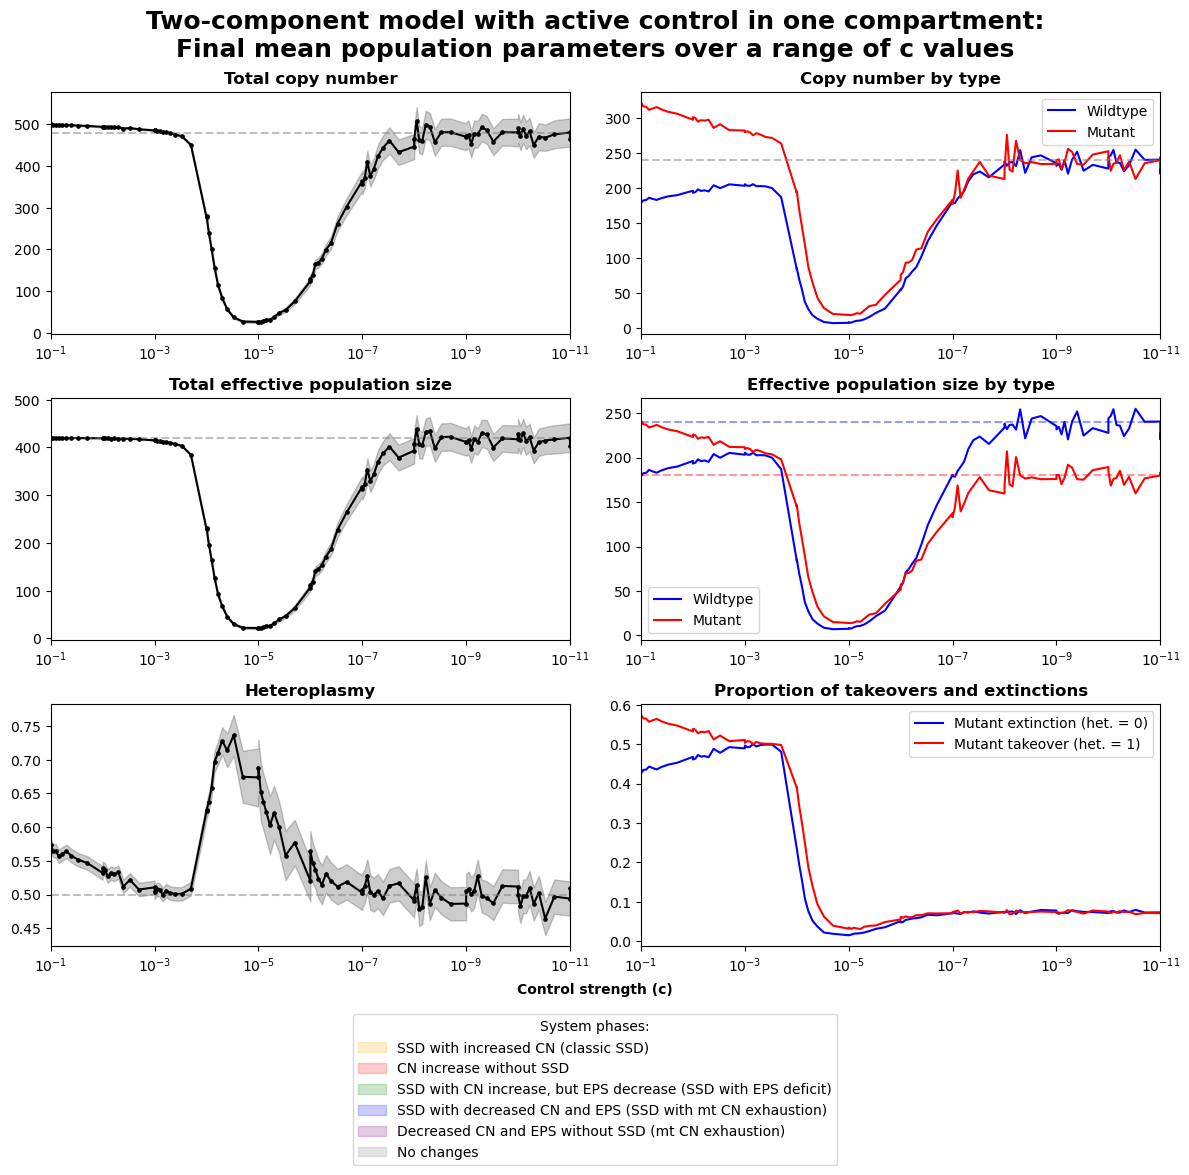

In [19]:
ps_mean = []
ps_sem = []
eps_mean = []
eps_sem = []
het_mean = []
het_sem = []

p_het_1 = []
p_het_0 = []

wt_mean = []
mt_mean = []

for i in i_cb_dict:
    df = pd.read_csv(f"sim_out/{MODEL}/{delta_folders[DELTA]}/paramdf_{i}_gillespie.csv")
    #df = pd.read_csv(f"hpc/model_1/paramdf_{i}_tauleaping.csv")
    final_vals = df.iloc[-1].to_dict()
    #print(final_vals)
    
    ps_mean.append(final_vals['ps_mean'])
    ps_sem.append(final_vals['ps_sem'])
    eps_mean.append(final_vals['eps_mean'])
    eps_sem.append(final_vals['eps_sem'])
    het_mean.append(final_vals['het_mean'])
    het_sem.append(final_vals['het_sem'])
    
    p_het_1.append(final_vals['p_het_1'])
    p_het_0.append(final_vals['p_het_0'])
    
    wt_mean.append(final_vals['a_wt_mean'] + final_vals['s_wt_mean'])
    mt_mean.append(final_vals['a_mt_mean'] + final_vals['s_mt_mean'])
    
ps_mean = np.array(ps_mean)
ps_sem = np.array(ps_sem)
eps_mean = np.array(eps_mean)
eps_sem = np.array(eps_sem)
het_mean = np.array(het_mean)
het_sem = np.array(het_sem)

wt_mean = np.array(wt_mean)
mt_mean = np.array(mt_mean)

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0,0].fill_between(cb_vals, ps_mean-(2*ps_sem), ps_mean+(2*ps_sem), alpha = 0.2, zorder=1, color = 'k')
axs[0,0].plot(cb_vals, ps_mean, zorder=2, color = 'k')
axs[0,0].scatter(cb_vals, ps_mean, s = 5.5, color = 'k', zorder=3)
axs[0,0].axhline(df.iloc[0]['ps_mean'], color = 'grey', alpha = 0.5, linestyle='dashed')
axs[0,0].set_title("Total copy number", weight='bold')


axs[1,0].fill_between(cb_vals, eps_mean-(2*eps_sem), eps_mean+(2*eps_sem), alpha = 0.2, zorder=1, color = 'k')
axs[1,0].plot(cb_vals, eps_mean, zorder=2, color = 'k')
axs[1,0].scatter(cb_vals, eps_mean, s = 5.5, color = 'k', zorder=3)
axs[1,0].axhline(df.iloc[0]['eps_mean'], color = 'grey', alpha = 0.5, linestyle='dashed')
axs[1,0].set_title("Total effective population size", weight='bold')


axs[2,0].fill_between(cb_vals, het_mean-(2*het_sem), het_mean+(2*het_sem), alpha = 0.2, zorder = 1, color = 'k')
axs[2,0].plot(cb_vals, het_mean, zorder=2, color = 'k')
axs[2,0].scatter(cb_vals, het_mean, s = 5.5, color = 'k', zorder=3)
axs[2,0].axhline(0.5, color = 'grey', alpha = 0.5, linestyle='dashed')
axs[2,0].set_title("Heteroplasmy", weight='bold')



axs[0,1].plot(cb_vals, wt_mean, zorder=2, color = 'b', label = 'Wildtype')
axs[0,1].plot(cb_vals, mt_mean, zorder=2, color = 'r', label = 'Mutant')
axs[0,1].legend()
axs[0,1].axhline(df.iloc[0]['a_wt_mean']+df.iloc[0]['s_wt_mean'], color = 'grey', alpha = 0.5, linestyle='dashed')
axs[0,1].set_title("Copy number by type", weight='bold')


axs[1,1].plot(cb_vals, wt_mean, zorder=2, color = 'b', label = 'Wildtype')
axs[1,1].axhline(df.iloc[0]['a_wt_mean']+df.iloc[0]['s_wt_mean'], color = 'blue', alpha = 0.4, linestyle='dashed')
axs[1,1].plot(cb_vals, mt_mean*DELTA, zorder=2, color = 'r', label = 'Mutant')
axs[1,1].axhline((df.iloc[0]['a_mt_mean']+df.iloc[0]['s_mt_mean'])*DELTA, color = 'red', alpha = 0.4, linestyle='dashed')
axs[1,1].legend()
axs[1,1].set_title("Effective population size by type", weight='bold')


axs[2,1].plot(cb_vals, p_het_0, zorder=2, color = 'b', label = 'Mutant extinction (het. = 0)')
axs[2,1].plot(cb_vals, p_het_1, zorder=2, color = 'r', label = 'Mutant takeover (het. = 1)')
axs[2,1].legend()
axs[2,1].set_title("Proportion of takeovers and extinctions", weight='bold')


for col in axs:
    for ax in col:
        # set scales
        ax.invert_xaxis()
        ax.set_xscale("log")
        ax.set_xlim([0.1, 1e-11])

        # if MODEL == 'model_1':
        #     # set behavioural regions
        #     ax.axvspan(0.1, 0.0007, color='orange', alpha=0.1, zorder = 1)
        #     ax.axvspan(0.0007, 0.0002, color='red', alpha=0.1, zorder = 1)
        #     ax.axvspan(0.0002, 4e-05, color='green', alpha=0.1, zorder = 1)
        #     ax.axvspan(4e-05, 3e-07, color='blue', alpha=0.1, zorder = 1)
        #     ax.axvspan(3e-07, 5e-08, color='purple', alpha=0.1, zorder = 1)
        #     ax.axvspan(5e-08, 1e-12, color='grey', alpha=0.1, zorder = 1)
        # elif MODEL == 'model_0':
        #     # set behavioural regions
        #     ax.axvspan(0.1, 0.0003, color='orange', alpha=0.1, zorder = 1)
        #     ax.axvspan(0.0003, 8e-05, color='red', alpha=0.1, zorder = 1)
        #     ax.axvspan(8e-05, 1e-05, color='green', alpha=0.1, zorder = 1)
        #     ax.axvspan(1e-05, 3e-07, color='blue', alpha=0.1, zorder = 1)
        #     ax.axvspan(3e-07, 5e-08, color='purple', alpha=0.1, zorder = 1)
        #     ax.axvspan(5e-08, 1e-12, color='grey', alpha=0.1, zorder = 1)
            



# set up phase regions
patch_ssd     = mpatches.Patch(color='orange', alpha=0.2, label='SSD with increased CN (classic SSD)')
patch_cni     = mpatches.Patch(color='red', alpha=0.2, label='CN increase without SSD')
patch_ssd_cni = mpatches.Patch(color='green', alpha=0.2, label='SSD with CN increase, but EPS decrease (SSD with EPS deficit)')
patch_ssd_exh = mpatches.Patch(color='blue', alpha=0.2, label='SSD with decreased CN and EPS (SSD with mt CN exhaustion)')
patch_exh     = mpatches.Patch(color='purple', alpha=0.2, label='Decreased CN and EPS without SSD (mt CN exhaustion)')
patch_nc      = mpatches.Patch(color='grey', alpha=0.2, label='No changes')
# make legend
legend = fig.legend(
    handles=[patch_ssd, patch_cni, patch_ssd_cni, patch_ssd_exh, patch_exh, patch_nc], 
    loc='center', ncol=1, fancybox=True, bbox_to_anchor=(0.5, -0.1)
)
legend.set_title('System phases:')

if MODEL == 'model_1':
    control = 'one compartment'
elif MODEL == 'model_0':
    control = 'two compartments'
    
fig.suptitle(f'Two-component model with active control in {control}:\nFinal mean population parameters over a range of c values', size = 18, weight='bold')
fig.text(0.5, 0.00, 'Control strength (c)', ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()

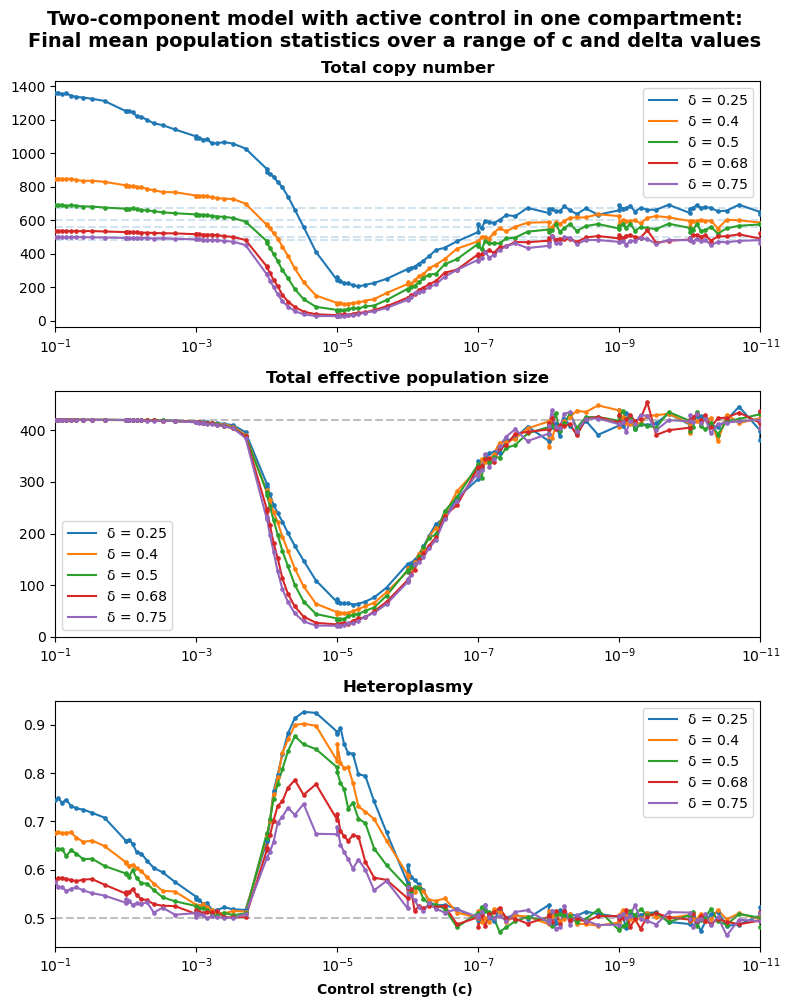

In [34]:
fig, axs = plt.subplots(3, figsize=(8, 10))

for DELTA in [0.25, 0.4, 0.5, 0.68, 0.75]:

    ps_mean = []
    ps_sem = []
    eps_mean = []
    eps_sem = []
    het_mean = []
    het_sem = []

    p_het_1 = []
    p_het_0 = []

    wt_mean = []
    mt_mean = []

    for i in i_cb_dict:
        df = pd.read_csv(f"sim_out/{MODEL}/{delta_folders[DELTA]}/paramdf_{i}_gillespie.csv")
        #df = pd.read_csv(f"hpc/model_1/paramdf_{i}_tauleaping.csv")
        final_vals = df.iloc[-1].to_dict()
        #print(final_vals)

        ps_mean.append(final_vals['ps_mean'])
        ps_sem.append(final_vals['ps_sem'])
        eps_mean.append(final_vals['eps_mean'])
        eps_sem.append(final_vals['eps_sem'])
        het_mean.append(final_vals['het_mean'])
        het_sem.append(final_vals['het_sem'])

        p_het_1.append(final_vals['p_het_1'])
        p_het_0.append(final_vals['p_het_0'])

        wt_mean.append(final_vals['a_wt_mean'] + final_vals['s_wt_mean'])
        mt_mean.append(final_vals['a_mt_mean'] + final_vals['s_mt_mean'])

    ps_mean = np.array(ps_mean)
    ps_sem = np.array(ps_sem)
    eps_mean = np.array(eps_mean)
    eps_sem = np.array(eps_sem)
    het_mean = np.array(het_mean)
    het_sem = np.array(het_sem)

    wt_mean = np.array(wt_mean)
    mt_mean = np.array(mt_mean)
    
    
    #axs[0].fill_between(cb_vals, ps_mean-(2*ps_sem), ps_mean+(2*ps_sem), alpha = 0.2, zorder=1, color = 'k')
    axs[0].plot(cb_vals, ps_mean, zorder=2, label = f'δ = {DELTA}')
    axs[0].scatter(cb_vals, ps_mean, s = 5.5, zorder=3)
    axs[0].axhline(df.iloc[0]['ps_mean'], alpha = 0.2, linestyle='dashed', zorder = 1)
    

    #axs[1].fill_between(cb_vals, eps_mean-(2*eps_sem), eps_mean+(2*eps_sem), alpha = 0.2, zorder=1, color = 'k')
    axs[1].plot(cb_vals, eps_mean, zorder=2, label =  f'δ = {DELTA}')
    axs[1].scatter(cb_vals, eps_mean, s = 5.5, zorder=3)

    #axs[2].fill_between(cb_vals, het_mean-(2*het_sem), het_mean+(2*het_sem), alpha = 0.2, zorder = 1, color = 'k')
    axs[2].plot(cb_vals, het_mean, zorder=2, label =  f'δ = {DELTA}')
    axs[2].scatter(cb_vals, het_mean, s = 5.5, zorder=3)



axs[0].set_title("Total copy number", weight='bold')
axs[0].legend()
axs[1].axhline(df.iloc[0]['eps_mean'], color = 'grey', alpha = 0.5, linestyle='dashed')
axs[1].set_title("Total effective population size", weight='bold')
axs[1].legend()
axs[2].axhline(0.5, color = 'grey', alpha = 0.5, linestyle='dashed')
axs[2].set_title("Heteroplasmy", weight='bold')
axs[2].legend()



for ax in axs:
    # set scales
    ax.invert_xaxis()
    ax.set_xscale("log")
    ax.set_xlim([0.1, 1e-11])


if MODEL == 'model_1':
    control = 'one compartment'
elif MODEL == 'model_0':
    control = 'two compartments'
    
fig.suptitle(f'Two-component model with active control in {control}:\nFinal mean population statistics over a range of c and delta values', size = 14, weight='bold')
fig.text(0.5, 0.00, 'Control strength (c)', ha='center', va='center', weight='bold')
plt.tight_layout()
plt.show()